<img src="logos.jpg" width="700" />

# Handwritten Digit Recognition

This tutorial guides you through a classic computer vision application using the framework Keras: identify hand written digits with a multi-layer perceptron neural network.


## Introduction

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. The brain receives the stimulus from the outside world, does the processing on the input, and then generates the output.

<img src="Neuron.png" style="max-width:50%; width: 50%; max-width: none">

Deep learning algorithms are actually Deep architectures of consecutive layers. Each layer applies a nonlinear transformation on its input and provides a representation in its output. The objective is to learn a complicated and abstract representation of the data in a hierarchical manner by passing the data through multiple transformation layers. The sensory data (for example pixels in an image) is fed to the first layer. Consequently the output of each layer is provided as input to its next layer and finally it produce an output that can be a categorization or a prediction.
<br><br>
The network you see below is a neural network made of interconnected neurons.
![title](nb1-2.png)

The circles in the picture above are neurons. Each neuron is characterized by its weight, bias and activation function. The input is fed to the input layer. The neurons do a linear transformation on the input by the weights and biases. The non linear transformation is done by the activation function. The information moves from the input layer to the hidden layers. The hidden layers would do the processing and send the final output to the output layer. This is the forward movement of information known as the forward propagation. But what if the output generated is far away from the expected value? In a neural network, we would update the weights and biases of the neurons on the basis of the error. This process is known as back-propagation. Once the entire data has gone through this process, the final weights and biases are used for predictions.

<img src="Perceptron.jpeg" style="max-width:50%; width: 50%; max-width: none">


<br><br>

Currently there are many tools available to start in the deep learning field like Keras, Pythorch, Tensorflow, etc.

Keras is a powerful easy-to-use Python library for developing and evaluating deep learning models across many platforms. It wraps the efficient numerical computation libraries like Theano, TensorFlow or CNTK and allows you to define and train neural network models in a few short lines of code with the use of it's consistent & simple APIs. Keras is without a doubt the easier option if you want a plug & play framework: to quickly build, train, and evaluate a model, without spending much time on mathematical implementation details.

The next figure show the general architecture of Keras.
![title](KerasArchitecture..jpg)
The flexible architecture allows you to deploy computation to one or more CPUs or GPUs with a single API.

### The key concepts

**Tensor** is a general name of multi-way array data. For example, 1-d tensor is a vector, 2d-tensor is a matrix and 3d-tensor is a cube. We can image 4d-tensor as a vector of cubes. Insimilar way, 5d-tensor is a matrix of cubes, and 6d-tensor is a cube of cubes.

<img src="Tensors.png" style="max-width:50%; width: 50%; max-width: none">

A **tensor** is defined by three key attributes:
* Number of axes (rank): For instance, a 3D tensor has three axes, and a matrix has two axes.
* Shape: This is a tuple of integers that describes how many dimensions the tensor has along each axis.
* Data type (usually called dtype in Python libraries): This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on.

**Tensor operations** are operations on tensors that again produce a tensor. All transformations learned by deep neural networks can be reduced to a handful of tensor operations applied to tensors of numeric data. For instance, it’s possible to add tensors, multiply tensors, reshape tensors, and so on.

<img src="TensorOperation.png" >

<br><br>

**Activation functions** are an extremely important feature of the artificial neural networks. They basically decide whether a neuron should be activated or not. Whether the information that the neuron is receiving is relevant for the given information or should it be ignored.

<img src="ActivationFunction.png" >

The activation function is the non linear transformation that we do over the input signal. This transformed output is then sen to the next layer of neurons as input.

The following are the common-used activation functions:

* **Sigmoid**: is a squashing function because it will adjust all the data points between 0 and 1. It's very popular in classification problems. So it can be written as **f(x)=1/(1+ex)**

* **Tanh**: is also sigmoidal ("s"-shaped) that outputs outputs values that range (-1, 1). So it can be written as **tanh(x)=2σ(2x)−1**

* **Rectified Linear Unit**: is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value x it returns that value back. So it can be written as **f(x)=max(0,x)**.

* **SoftMax**: The Softmax function (Used for multi-classification neural network output), or normalized exponential function, in mathematics, is a generalization of the logistic function that “squashes” a K-dimensional vector z from arbitrary real values to a K-dimensional vector σ(z) of real values in the range [0,1] that add up to 1. The function is given by 

<img src="Softmax.png" >

## Tools

* Keras (for developing and evaluating deep learning models)
* Matplot (to graph training history)
* Numpy (tensor operations)
* Scikitlearn (for data normalization)


## Step 1: Load the MNIST dataset
We first load the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. Each image in this dataset has been resized into 28x28 with grayscale values between 0 and 254.

Fortunately, the keras.datasets module already includes methods to load and fetch popular reference datasets like MNIST dataset.<br>
The following code load the images and the according labels. The variables x_train and y_train form the training set, the data that the model will learn from. The model will then be tested on the test set (x_test and y_test variables).

In [1]:
import keras
from keras.datasets import mnist
import numpy

(x_train, y_train), (x_test, y_test) = mnist.load_data() # returns two tuples of Numpy arrays. The first tuple represents the training x-y pairs while the second tuple represents the testing x-y pairs.

Using TensorFlow backend.


To see the dataset's content we plot the first 10 images and print their labels from training set. The next code iterate over the first 10 samples of the train set and use library matplotlib to show the images graphically and print the respective labels.

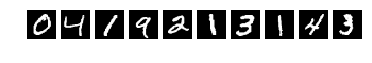

label: [5 0 4 1 9 2 1 3 1 4]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt # loads the plotting library into plt object
for i in range(1, 11): # iterate from 1 to 10
    plt.subplot(1, 10, i) # given a grid of n_rows (1) by n_cols (10) axes set a subplot at the i-th position
    plt.imshow(x_train[i], cmap='Greys_r') # set the subplot data and set the subplot type to gray scale
    plt.axis('off') # not show the axis in the subplot
plt.show() # show the plot

print('label: %s' % (y_train[0:10],)) # show the first 10 train's labels

The next code show the shape (dimensions) of the train and test sets.

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We see that there are 60,000 and 10,000 samples for the train and test sets respectively with an array of 28 by 28 pixels each one.

## Step 2: Preprocess dataset

The MNIST training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer model <b>we must reduce the datasets down into a two dimensional array</b> by applying reshaping. Apply tensor reshaping means rearrangement of its dimensions to match a target shape (in this case the input shape needed by the following neural network's input <b>densely connected layer</b> of the step 4 that is a two dimensional array).

The following code transforms the train and test sets with shape of (n_samples, image_width, image_height) to (n_samples, image_width * image_height).


In [4]:
x_train = x_train.reshape(x_train.shape[0], 784)# image_width * image_height = 28 * 28 = 784
x_test = x_test.reshape(x_test.shape[0], 784)

# show again the train and test's shape
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by Keras anyway. The next code cast the datatype of each value within the train and test sets.

In [5]:
x_train = x_train.astype('float32') # cast each element of the array to float32 datatype
x_test = x_test.astype('float32')

When using neural network models is a good idea to perform normalization of the values to the range 0 and 1. The next code use a function from Scikitlearn to normalize (values between 0 and 1) each value within the train and test sets.

In [6]:
from sklearn.preprocessing import MinMaxScaler # load object that transforms features by scaling each feature to a given range.

sc = MinMaxScaler(feature_range=(0,1)) # desired range of transformed data.

x_train = sc.fit_transform(x_train) # apply transformation to each array element 
x_test = sc.fit_transform(x_test)

## Step 3: Preprocess class labels for neural network

First of all we show class label's shape of train and test sets. 

In [7]:
print(y_train.shape) 
print(y_test.shape)

(60000,)
(10000,)


The number of values per sample isn't clear because there is a blank value. Let's show the first 10 training's label values.

In [8]:
print y_train[:10] 

[5 0 4 1 9 2 1 3 1 4]


The problem is that there are 1-dimensional class arrays and the model expects a class matrix. Then we convert the 1-dimensional class arrays into a 10-dimensional class matrix. We can easily do this using the built-in to_categorical() helper function in Keras (this step is also called **one hot encoding**). <br><br>
The next code use the to_categorical() function to convert the 1-dimensional class arrays into a 10-dimensional class matrix of the train and test sets.

In [9]:
num_classes = 10

# apply transformation to each array element
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

# show the train and test's shapes
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Now we have the needed 10-dimensional matrix per label.

Let's show the first 10 labels again.

In [10]:
print y_train[:10]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Now there is a matrix of float numbers instead of only one integer number.

## Step 4: Define model's architecture and layers

In this tutorial we will use an multi-layer perceptron that is perhaps one of the most traditional type of deep learning architecture, and that's when every neuron of a previous layer, is connected to every neuron of the next layer. It looks like this:


![title](nb1-2.png)

Optional: If you want to see a neural network in action on the browser [click here](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.70873&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&learningRate_hide=true&regularizationRate_hide=true&regularization_hide=true&percTrainData_hide=true&noise_hide=true) and press the play button.
<br><br><br>
In Keras to define a model there are two ways:
* By using the [Sequential Model](https://keras.io/models/sequential) that is a linear stack of layers.
* Or by using [the functional API](https://keras.io/models/model) that is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.
<br>

Let's start by declaring a sequential model, which is the most common way by far.

In [11]:
from keras.models import Sequential 

model = Sequential()

Now declare the input layer, as a 784 way [densely connected](https://keras.io/layers/core/#dense) (also called fully connected). A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer (in this case the input data), thus densely connected. <br>

In [12]:
from keras.layers import Dense

model.add(Dense(28*28, input_dim=28*28, activation='sigmoid', kernel_initializer='normal'))

Note: 
* In the previous code line are defined two layers, the input layer with 768 neurons (second parameter) that correspond to the number of features (number of pixels in each sample image) and the first hidden layer with 768 neurons whose number is arbitrary (first parameter) .<br>
* The number of neurons in the hidden layer shouldn't be too large to avoid overfitting (in other words that the network remember the training data) and the number of neurons shouldn't be too short to allow that the network learn the features to reach the generalization (to fit well on new and unseen data).<br>

Parameter explanation:<br>
The first parameter corresponds to the dimensionality of the output space (the number of neurons in the next layer that in this case is the first hidden layer).<br>
The input shape (second parameter) should be the number of features (in this case 768 pixels).<br>
The sigmoid activation function (third parameter) is used for models where we have to predict a probability.<br>
The [kernel_initializer supported by Keras](https://keras.io/initializers/) specifies how the layer's weights are initially randomized. 
<br><br>
Dense layer implements the operation: output = <b>activation(dot(input, kernel) + bias)</b> where:<br>
<b>activation</b> is the activation function.<br>
<b>dot</b> means the multiplication of input and kernel arrays.<br>
<b>input</b> is the training data.<br>
<b>kernel</b> is an array containing the weight of each neuron which initial values was generated randomly.<br>
<b>bias</b> is a vector created by the layer which initial values was generated randomly.<br>
<br>
The [activations supported by keras](https://keras.io/activations/) are the following:
![title](nb1-3.png)
<br><br>


The next code show the number of input neurons to the hidden layer and the neurons of the hidden layer.

In [13]:
print("Number of input neurons of the hidden layer:" + str(model.input_shape) )
print("Number of neurons of the hidden layer:" + str(model.output_shape) )

Number of input neurons of the hidden layer:(None, 784)
Number of neurons of the hidden layer:(None, 784)


At this point we can add more layers to our model like we're  building legos.

The next code adds the output layer to the model with 10 neurons (corresponding to the 10 classes of digits):

In [14]:
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

The softmax activation function is used on the output layer to turn the outputs into probability-like (in this case the probability of being one of the 10 categories).<br><br>

The next code show the number of input neurons to the output layer and the neurons of the output layer.

In [15]:
print("Number of input neurons of the output layer:" + str(model.input_shape) )
print("Number of neurons of the output layer:" + str(model.output_shape) )

Number of input neurons of the output layer:(None, 784)
Number of neurons of the output layer:(None, 10)


Note: 
* Keras automatically handles the connections between layers.
* Keras does backpropagation automatically.
<br><br>

The resulting model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784) and an output layer with 10 neurons (number of classes).

![title](nb1-1.jpg)

## Step 5: Compile model

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to make predictions for the problem.
We must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network and any optional metrics we would like to collect and report during training.

Given the nature of the problem (categorization of images) we use the categorical_crossentropy function and for optimizer we use the efficient default gradient descent algorithm "adam".

In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Keras has a variety of [loss functions](https://keras.io/objectives/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from depending of the problem.

## Step 6: Fit model on training data

To fit the model, all we have to do is to declare the number of epochs to train for, then pass in our training data.

In [17]:
history = model.fit(x_train, # numpy array of training data.
                    y_train, # numpy array of training target (label) data.
                    epochs=30, # number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
                    verbose=2, # verbosity mode: 0 = silent, 1 = progress bar, 2 = one line per epoch.
                    validation_split=0.2) # float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided.


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
 - 34s - loss: 0.3605 - acc: 0.8971 - val_loss: 0.2602 - val_acc: 0.9212
Epoch 2/30
 - 30s - loss: 0.1892 - acc: 0.9430 - val_loss: 0.1567 - val_acc: 0.9546
Epoch 3/30
 - 38s - loss: 0.1245 - acc: 0.9626 - val_loss: 0.1257 - val_acc: 0.9626
Epoch 4/30
 - 62s - loss: 0.0859 - acc: 0.9744 - val_loss: 0.1062 - val_acc: 0.9672
Epoch 5/30
 - 63s - loss: 0.0636 - acc: 0.9808 - val_loss: 0.0855 - val_acc: 0.9736
Epoch 6/30
 - 74s - loss: 0.0452 - acc: 0.9871 - val_loss: 0.0829 - val_acc: 0.9747
Epoch 7/30
 - 51s - loss: 0.0331 - acc: 0.9903 - val_loss: 0.0736 - val_acc: 0.9781
Epoch 8/30
 - 31s - loss: 0.0253 - acc: 0.9928 - val_loss: 0.0836 - val_acc: 0.9766
Epoch 9/30
 - 38s - loss: 0.0182 - acc: 0.9953 - val_loss: 0.0758 - val_acc: 0.9768
Epoch 10/30
 - 33s - loss: 0.0134 - acc: 0.9965 - val_loss: 0.0793 - val_acc: 0.9770
Epoch 11/30
 - 38s - loss: 0.0101 - acc: 0.9975 - val_loss: 0.0768 - val_acc: 0.9797
Epoch 12/30
 - 39s - los

## Step 7: Evaluate model on test data

We can evaluate our model on the test data.

In [18]:
score = model.evaluate(x_test, # numpy array of test data.
                       y_test, # numpy array of test target (label) data.
                       verbose=0 # verbosity mode: 0 = silent, 1 = progress bar, 2 = one line per epoch.
                      )
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.11860276916752323)
('Test accuracy:', 0.9772)


## Step 8: Graph training history

We can graph the training history to visualize the neural network performance over each iteration and to detect  overfitting. <br>
The overfitting is the case where the predictor model fits perfectly on the training examples, but does badly on the test examples and can be visualized by the separation of the train and test curves in the graphs. The overfit can be avoided by reducing the number of neurons (the higher the number of hidden nodes the more the network will adapt to the training data and "remember" it, thereby preventing generalization) that depends on the complexity of the dataset (the more complex our data set, the more hidden nodes are needed). 

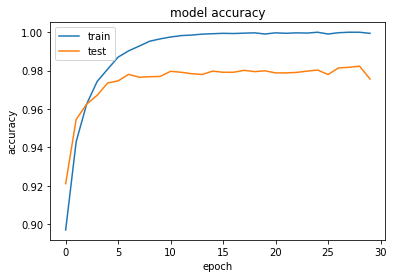

In [19]:
%matplotlib inline
plt.plot(
    history.history['acc'] # set the accuracy train statistics per epoch
)
plt.plot(
    history.history['val_acc'] # set the accuracy test statistics per epoch
)
plt.title('model accuracy')
plt.ylabel('accuracy') # set the y-axis label of the current axes.
plt.xlabel('epoch') # set the x-axis label of the current axes.
plt.legend( # places a legend on the axes.
    ['train', 'test'], # a list of labels.
    loc='upper left' # the location of the legend.
)
plt.show()

Finally we can graph the loss history over each iteration .

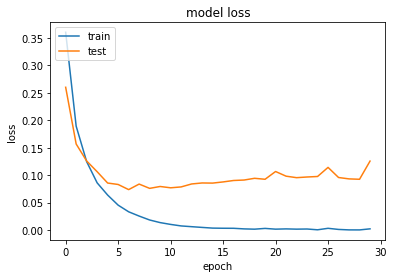

In [20]:
plt.plot(
    history.history['loss'] # set the loss train statistics per epoch
) 
plt.plot(
    history.history['val_loss'] # set the loss test statistics per epoch
) 
plt.title('model loss') 
plt.ylabel('loss') # set the y-axis label of the current axes.
plt.xlabel('epoch') # set the x-axis label of the current axes.
plt.legend( # places a legend on the axes.
    ['train', 'test'], # a list of labels. 
    loc='upper left' # the location of the legend.
) 
plt.show()

## Step 9: Create predictions on the test set

Finally to create predictions using specific data we can use the predict_classes() function.

The next code take the first 10 samples of the test set, pass each one to the model for prediction, print the resulting prediction with the respective true classification label and show the image.

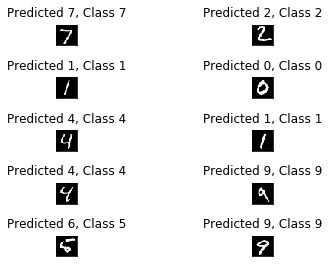

In [21]:
predicted_classes = model.predict_classes(x_test[0:10])# predict the classs for the first 10 test samples
x_test = x_test.reshape(x_test.shape[0], 28, 28)# reshape the test set to the original shape (n_samples, 28, 28) for image plotting 

for i, predicted_class in enumerate(predicted_classes): # iterate over each predicted class
    plt.subplot(5,2,i+1) # given a grid of n_rows (5) by n_cols (2) axes set a subplot at the i-th position
    plt.tight_layout() # add margin between each image
    plt.imshow(x_test[i], cmap='Greys_r') # set the subplot data and set the subplot type to gray scale
    plt.title("Predicted {}, Class {}".format( # set a subplot title
                predicted_class, # predicted label
                numpy.argmax(y_test[i]) ) # get the original label 
                , y=1.08 # set title margin in the y-axis
             )
    plt.xticks([]) # disable xticks 
    plt.yticks([]) # disable yticks
plt.show()

## Save and Load Your Keras Deep Learning Models

Deep learning models can take hours, days and even weeks to train, it is important to know how to save and load them from disk.

Keras provides the ability to describe any model using JSON format with a to_json() function. This can be saved to file and later loaded via the model_from_json() function that will create a new model from the JSON specification.

The weights are saved directly from the model using the save_weights() function and later loaded using the load_weights() function.

### Save model

The next code save the model and weights to the "model.json" and "weights.h5" respectively.

In [22]:
# serialize model to JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file: # create a new file called "model.json"
    json_file.write(model_json)
# serialize weights to HDF5 file
model.save_weights("weights.h5")

### Load model

The model and weight data can be loaded from the saved files and a new model is created. It is important to compile the loaded model before it is used. This is so that predictions made using the model can use the appropriate efficient computation from the Keras backend.


In [23]:
from keras.models import model_from_json

# load json file and create model from file
json_file = open('model.json', 'r') # open model file
loaded_model_json = json_file.read() # load the file contents
json_file.close() # close the file
loaded_model = model_from_json(loaded_model_json) # Create model from loaded file

loaded_model.load_weights("weights.h5") # Load weights file into the model
print("Loaded model from disk")

# evaluate loaded model on test data
x_test = x_test.reshape(x_test.shape[0], 784)# reshape again the test set to evaluate the loaded model 
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # compile the loaded model
score = loaded_model.evaluate(x_train, y_train, verbose=0) # evaluate the model with the test set
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 99.86%


## Conclusions 

* Keras is a framework to quickly build, train and evaluate a model, without spending much time on mathematical implementation details.
* The activation functions introduce non-linear properties to the networks.
* Is a good practice normalize the network input data.
* The softmax activation function is commonly used in multi-class problems due it assigns decimal probabilities to each class.
* In multi-class problems is commonly used the error function categorical_crossentropy.
